In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import os
from collections import Counter
import random

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [16]:
base = Path('roboflow_new_nov17')
train_images = base / 'train' / 'images'
train_labels_dir = base / 'train' / 'labels'
valid_images = base / 'valid' / 'images'
valid_labels_dir = base / 'valid' / 'labels'
test_images = base / 'test' / 'images'
test_labels_dir = base / 'test' / 'labels'

In [17]:
train_imgs = list(train_images.glob('*'))
valid_imgs = list(valid_images.glob('*'))
test_imgs = list(test_images.glob('*'))
train_labels = list(train_labels_dir.glob('*.txt'))

print(f'Train Images: {len(train_imgs)}')
print(f'Valid Images: {len(valid_imgs)}')
print(f'Test Images: {len(test_imgs)}')
print(f'Total Images: {len(train_imgs) + len(valid_imgs) + len(test_imgs)}')
print(f'Train Labels: {len(train_labels)}')

Train Images: 7182
Valid Images: 1815
Test Images: 636
Total Images: 9633
Train Labels: 7182


In [18]:
class_map = {
    0: 'Grenade',
    1: 'Knife',
    2: 'Missile',
    3: 'Pistol',
    4: 'Rifle'
}

print('Class Mapping:')
for k, v in class_map.items():
    print(f'{k}: {v}')

Class Mapping:
0: Grenade
1: Knife
2: Missile
3: Pistol
4: Rifle


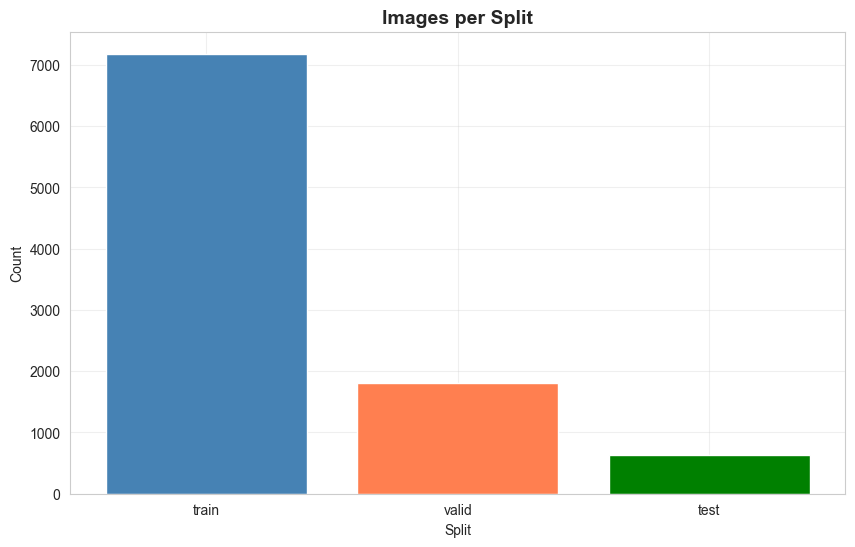

   split  count
0  train   7182
1  valid   1815
2   test    636


In [19]:
split_data = {
    'split': ['train', 'valid', 'test'],
    'count': [len(train_imgs), len(valid_imgs), len(test_imgs)]
}
split_df = pd.DataFrame(split_data)

plt.figure(figsize=(10, 6))
plt.bar(split_df['split'], split_df['count'], color=['steelblue', 'coral', 'green'])
plt.title('Images per Split', fontsize=14, fontweight='bold')
plt.xlabel('Split')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

print(split_df)

In [20]:
widths = []
heights = []
for img in train_imgs[:500]:
    im = Image.open(img)
    widths.append(im.width)
    heights.append(im.height)

print(f'Image Dimensions (first 500 train images):')
print(f'Avg width: {np.mean(widths):.0f}')
print(f'Avg height: {np.mean(heights):.0f}')
print(f'Min width: {np.min(widths)}')
print(f'Max width: {np.max(widths)}')
print(f'Min height: {np.min(heights)}')
print(f'Max height: {np.max(heights)}')

Image Dimensions (first 500 train images):
Avg width: 640
Avg height: 640
Min width: 640
Max width: 640
Min height: 640
Max height: 640


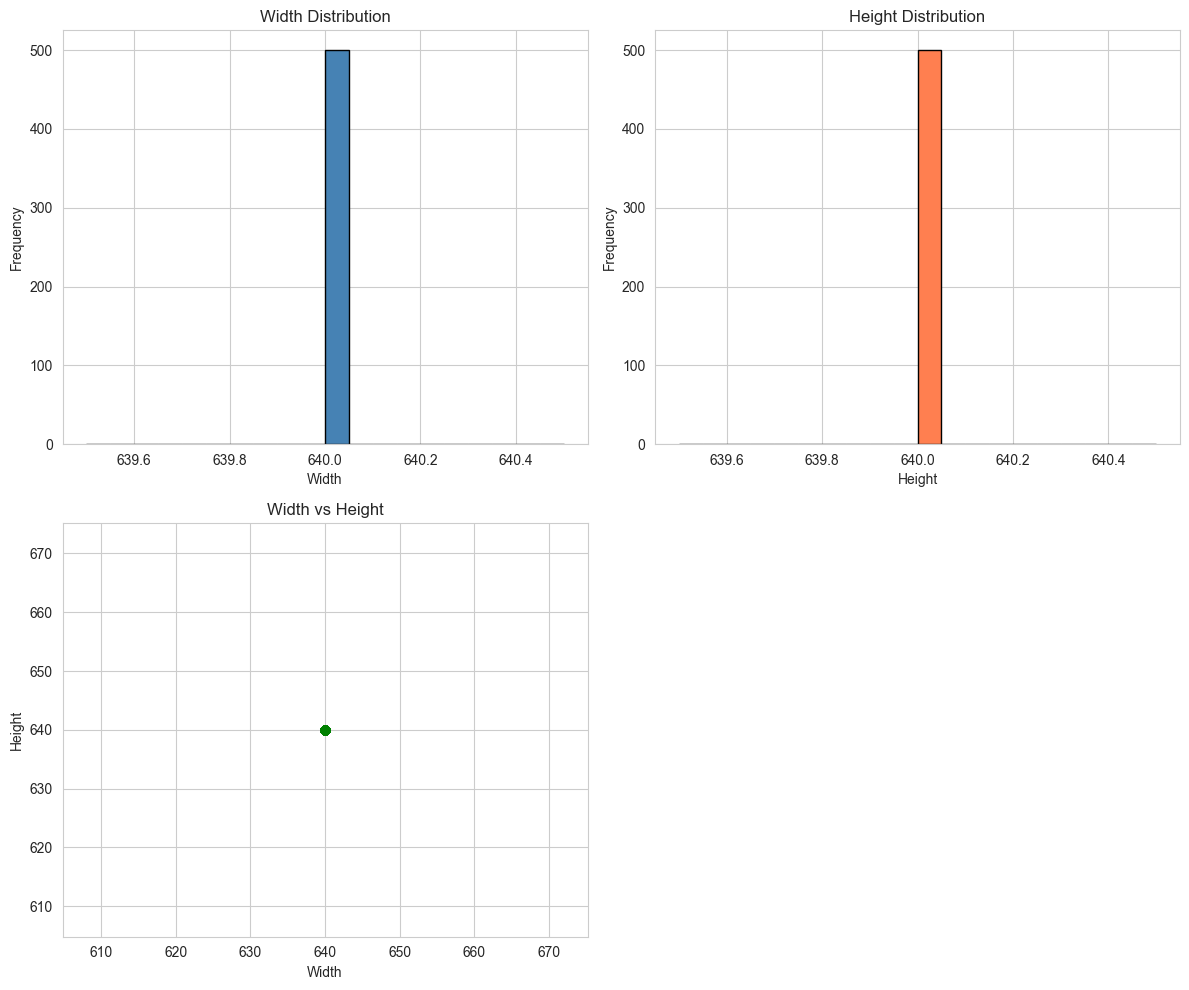

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].hist(widths, bins=20, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Width Distribution')
axes[0, 0].set_xlabel('Width')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(heights, bins=20, color='coral', edgecolor='black')
axes[0, 1].set_title('Height Distribution')
axes[0, 1].set_xlabel('Height')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].scatter(widths, heights, alpha=0.5, color='green')
axes[1, 0].set_title('Width vs Height')
axes[1, 0].set_xlabel('Width')
axes[1, 0].set_ylabel('Height')

axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

Image Format Distribution:
.jpg: 500


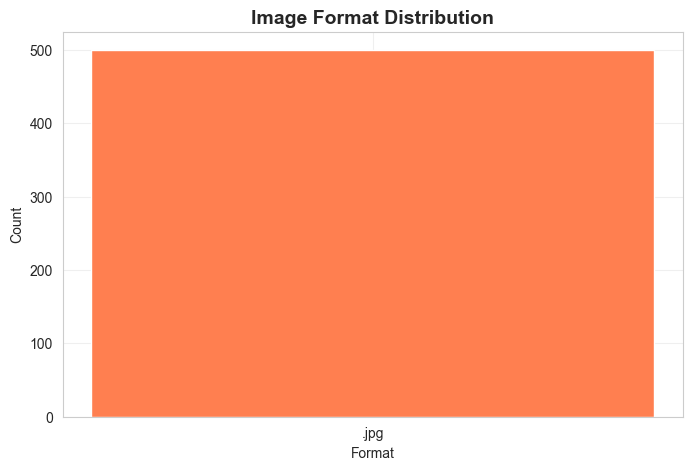

In [22]:
formats = []
for img in train_imgs[:500]:
    formats.append(img.suffix.lower())

format_counts = Counter(formats)
print('Image Format Distribution:')
for fmt, count in format_counts.items():
    print(f'{fmt}: {count}')

plt.figure(figsize=(8, 5))
plt.bar(format_counts.keys(), format_counts.values(), color='coral')
plt.title('Image Format Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Format')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
class_dist_labels = {}
bbox_widths = []
bbox_heights = []

for label_file in train_labels[:1000]:
    with open(label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:
                cls, x_c, y_c, width, height = map(float, parts)
                cls = int(cls)
                class_dist_labels[cls] = class_dist_labels.get(cls, 0) + 1
                bbox_widths.append(width)
                bbox_heights.append(height)

class_names_labels = [class_map[c] for c in sorted(class_dist_labels.keys())]
class_counts_labels = [class_dist_labels[c] for c in sorted(class_dist_labels.keys())]

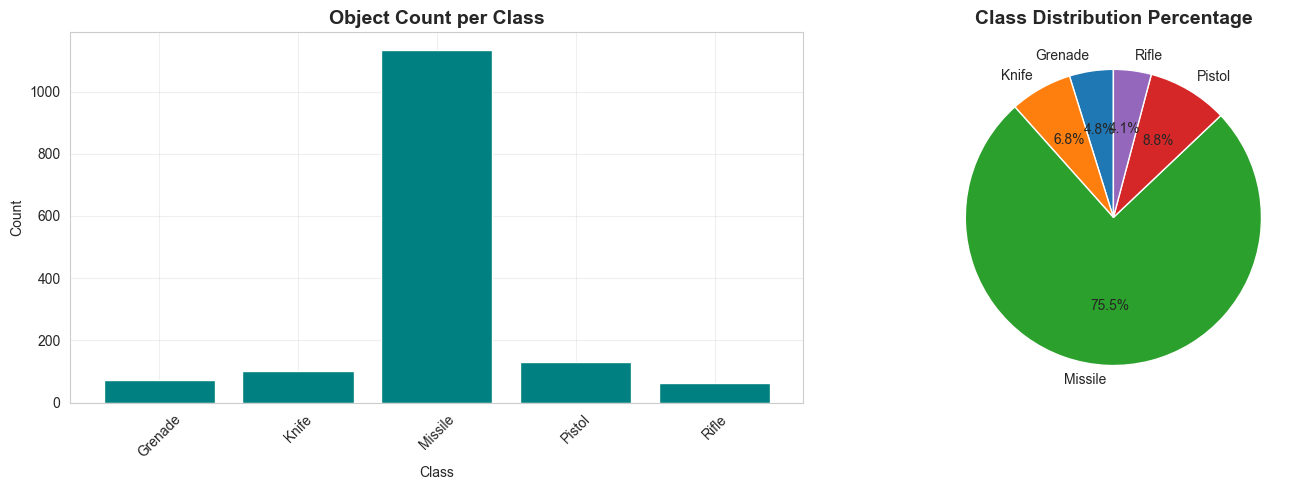


Class Distribution:
Grenade: 72
Knife: 102
Missile: 1134
Pistol: 132
Rifle: 62


In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(class_names_labels, class_counts_labels, color='teal')
axes[0].set_title('Object Count per Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

axes[1].pie(class_counts_labels, labels=class_names_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Class Distribution Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print('\nClass Distribution:')
for cls, count in zip(class_names_labels, class_counts_labels):
    print(f'{cls}: {count}')

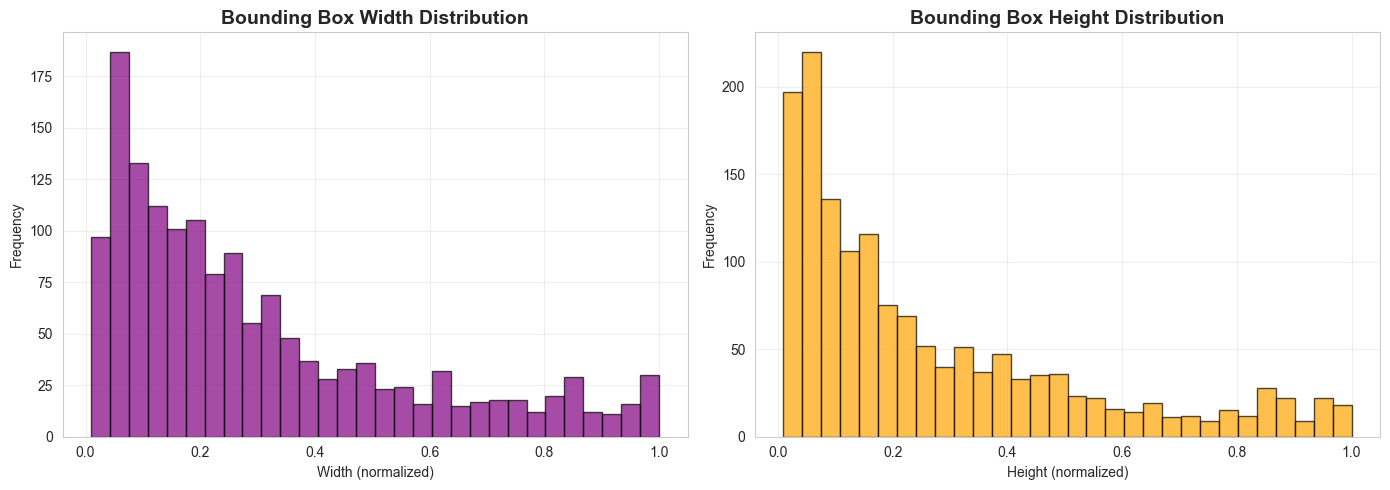

BBox Width - Min: 0.009, Max: 1.000, Mean: 0.298
BBox Height - Min: 0.009, Max: 1.000, Mean: 0.267


In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(bbox_widths, bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[0].set_title('Bounding Box Width Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Width (normalized)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

axes[1].hist(bbox_heights, bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_title('Bounding Box Height Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Height (normalized)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'BBox Width - Min: {min(bbox_widths):.3f}, Max: {max(bbox_widths):.3f}, Mean: {np.mean(bbox_widths):.3f}')
print(f'BBox Height - Min: {min(bbox_heights):.3f}, Max: {max(bbox_heights):.3f}, Mean: {np.mean(bbox_heights):.3f}')

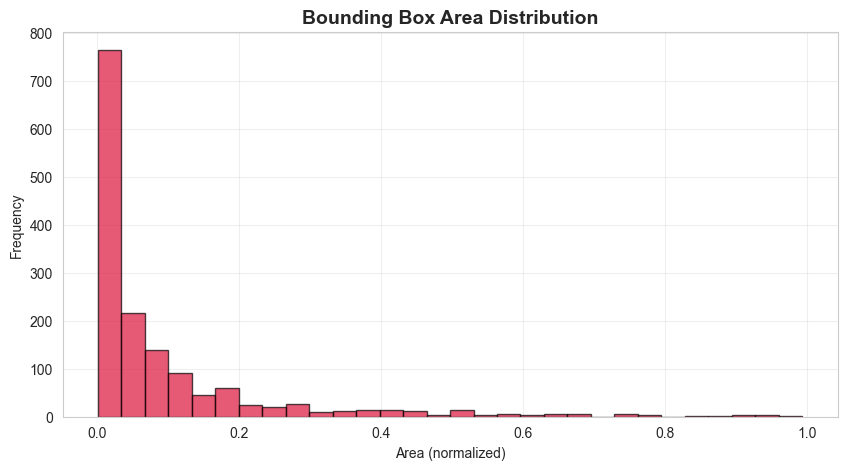

BBox Area - Min: 0.000, Max: 0.994, Mean: 0.091


In [26]:
bbox_areas = [w * h for w, h in zip(bbox_widths, bbox_heights)]

plt.figure(figsize=(10, 5))
plt.hist(bbox_areas, bins=30, color='crimson', alpha=0.7, edgecolor='black')
plt.title('Bounding Box Area Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Area (normalized)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f'BBox Area - Min: {min(bbox_areas):.3f}, Max: {max(bbox_areas):.3f}, Mean: {np.mean(bbox_areas):.3f}')

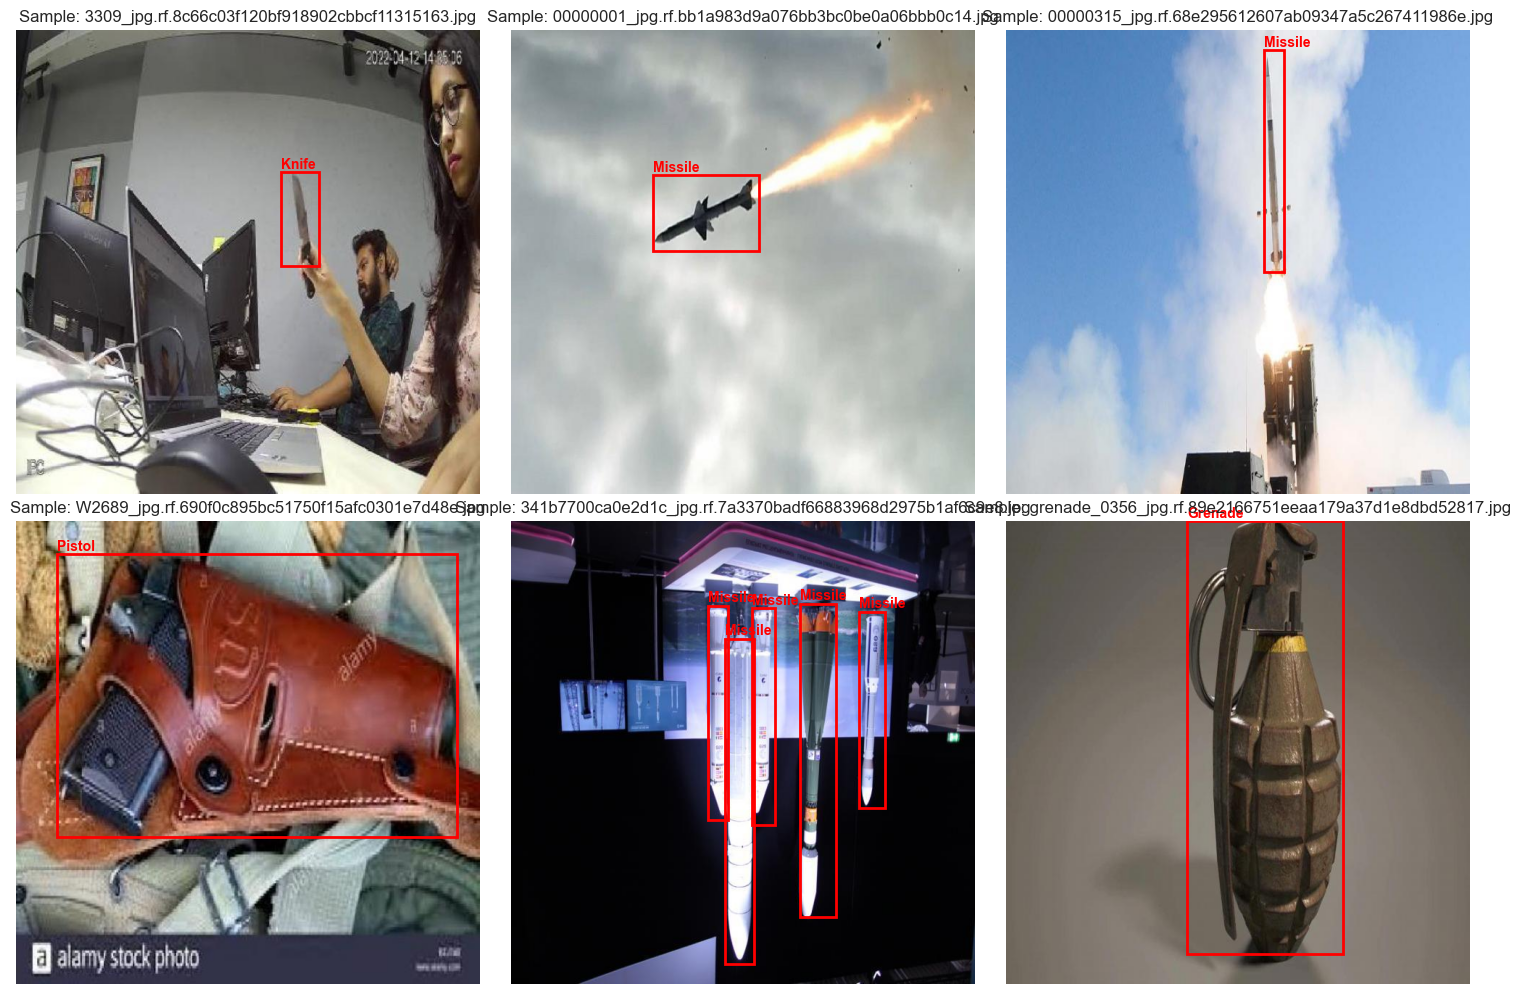

In [27]:
sample_indices = random.sample(range(len(train_imgs)), 6)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, img_idx in enumerate(sample_indices):
    img_path = train_imgs[img_idx]
    label_path = train_labels_dir / (img_path.stem + '.txt')
    
    img = Image.open(img_path)
    img_array = np.array(img)
    h, w = img_array.shape[:2]
    
    axes[idx].imshow(img_array)
    
    if label_path.exists():
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    cls, x_c, y_c, width, height = map(float, parts)
                    x_c *= w
                    y_c *= h
                    width *= w
                    height *= h
                    x1 = x_c - width / 2
                    y1 = y_c - height / 2
                    
                    rect = plt.Rectangle((x1, y1), width, height, fill=False, edgecolor='red', linewidth=2)
                    axes[idx].add_patch(rect)
                    axes[idx].text(x1, y1 - 5, class_map[int(cls)], color='red', fontsize=10, fontweight='bold')
    
    axes[idx].set_title(f'Sample: {img_path.name}', fontsize=12)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [28]:
print('\n=== COMPLETE DATASET SUMMARY ===')
print(f'\nTotal Images: {len(train_imgs) + len(valid_imgs) + len(test_imgs)}')
print(f'Train: {len(train_imgs)}, Valid: {len(valid_imgs)}, Test: {len(test_imgs)}')
print(f'\nTotal Classes: {len(class_map)}')
print(f'Classes: {", ".join(class_map.values())}')
print(f'\nImage Dimensions:')
print(f'  Width - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.0f}')
print(f'  Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.0f}')
print(f'\nBounding Boxes:')
print(f'  Total Objects: {len(bbox_widths)}')
print(f'  Width - Min: {min(bbox_widths):.3f}, Max: {max(bbox_widths):.3f}, Mean: {np.mean(bbox_widths):.3f}')
print(f'  Height - Min: {min(bbox_heights):.3f}, Max: {max(bbox_heights):.3f}, Mean: {np.mean(bbox_heights):.3f}')
print(f'  Area - Min: {min(bbox_areas):.3f}, Max: {max(bbox_areas):.3f}, Mean: {np.mean(bbox_areas):.3f}')


=== COMPLETE DATASET SUMMARY ===

Total Images: 9633
Train: 7182, Valid: 1815, Test: 636

Total Classes: 5
Classes: Grenade, Knife, Missile, Pistol, Rifle

Image Dimensions:
  Width - Min: 640, Max: 640, Mean: 640
  Height - Min: 640, Max: 640, Mean: 640

Bounding Boxes:
  Total Objects: 1502
  Width - Min: 0.009, Max: 1.000, Mean: 0.298
  Height - Min: 0.009, Max: 1.000, Mean: 0.267
  Area - Min: 0.000, Max: 0.994, Mean: 0.091
